In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score, mean_absolute_error, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

In [69]:
df = pd.read_csv('weight_change_dataset.csv')
df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [70]:
df.drop(['Participant ID', 'Final Weight (lbs)'], axis=1, inplace=True)
df

,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level
0,56,M,228.4,3102.3,3916.0,813.7,0.20000,1,Sedentary,Excellent,6
1,46,F,165.4,2275.5,3823.0,1547.5,2.40000,6,Very Active,Excellent,6
2,32,F,142.8,2119.4,2785.4,666.0,1.40000,7,Sedentary,Good,3
3,25,F,145.5,2181.3,2587.3,406.0,0.80000,8,Sedentary,Fair,2
4,38,M,155.5,2463.8,3312.8,849.0,2.00000,10,Lightly Active,Good,1
...,...,...,...,...,...,...,...,...,...,...,...
95,59,M,181.9,2622.8,3656.2,1033.4,0.60000,2,Lightly Active,Excellent,3
96,56,F,116.5,1736.5,2756.5,1020.0,-8.92309,12,Moderately Active,Good,9
97,58,F,162.7,2188.6,3344.3,1155.8,3.60000,12,Lightly Active,Fair,7
98,45,M,179.8,2671.9,4000.0,1328.1,2.00000,5,Moderately Active,Fair,5


In [71]:
gender_dummies = pd.get_dummies(df['Gender'], dtype=int, drop_first=True)
gender_dummies.rename(columns={'M': 'is_male'}, inplace=True)
df = pd.concat([df, gender_dummies], axis=1)
df.drop('Gender', axis=1, inplace=True)
df

,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,is_male
0,56,228.4,3102.3,3916.0,813.7,0.20000,1,Sedentary,Excellent,6,1
1,46,165.4,2275.5,3823.0,1547.5,2.40000,6,Very Active,Excellent,6,0
2,32,142.8,2119.4,2785.4,666.0,1.40000,7,Sedentary,Good,3,0
3,25,145.5,2181.3,2587.3,406.0,0.80000,8,Sedentary,Fair,2,0
4,38,155.5,2463.8,3312.8,849.0,2.00000,10,Lightly Active,Good,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,59,181.9,2622.8,3656.2,1033.4,0.60000,2,Lightly Active,Excellent,3,1
96,56,116.5,1736.5,2756.5,1020.0,-8.92309,12,Moderately Active,Good,9,0
97,58,162.7,2188.6,3344.3,1155.8,3.60000,12,Lightly Active,Fair,7,0
98,45,179.8,2671.9,4000.0,1328.1,2.00000,5,Moderately Active,Fair,5,1


In [72]:
df['Physical Activity Level'] = df['Physical Activity Level'].map(
    {'Sedentary': 0, 'Very Active': 3, 'Lightly Active': 1, 'Moderately Active': 2})
df

,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,is_male
0,56,228.4,3102.3,3916.0,813.7,0.20000,1,0,Excellent,6,1
1,46,165.4,2275.5,3823.0,1547.5,2.40000,6,3,Excellent,6,0
2,32,142.8,2119.4,2785.4,666.0,1.40000,7,0,Good,3,0
3,25,145.5,2181.3,2587.3,406.0,0.80000,8,0,Fair,2,0
4,38,155.5,2463.8,3312.8,849.0,2.00000,10,1,Good,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,59,181.9,2622.8,3656.2,1033.4,0.60000,2,1,Excellent,3,1
96,56,116.5,1736.5,2756.5,1020.0,-8.92309,12,2,Good,9,0
97,58,162.7,2188.6,3344.3,1155.8,3.60000,12,1,Fair,7,0
98,45,179.8,2671.9,4000.0,1328.1,2.00000,5,2,Fair,5,1


In [73]:


df['Sleep Quality'] = df['Sleep Quality'].map(
    {'Poor': 0, 'Excellent': 3, 'Fair': 1, 'Good': 2})
df

,Age,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,is_male
0,56,228.4,3102.3,3916.0,813.7,0.20000,1,0,3,6,1
1,46,165.4,2275.5,3823.0,1547.5,2.40000,6,3,3,6,0
2,32,142.8,2119.4,2785.4,666.0,1.40000,7,0,2,3,0
3,25,145.5,2181.3,2587.3,406.0,0.80000,8,0,1,2,0
4,38,155.5,2463.8,3312.8,849.0,2.00000,10,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...
95,59,181.9,2622.8,3656.2,1033.4,0.60000,2,1,3,3,1
96,56,116.5,1736.5,2756.5,1020.0,-8.92309,12,2,2,9,0
97,58,162.7,2188.6,3344.3,1155.8,3.60000,12,1,1,7,0
98,45,179.8,2671.9,4000.0,1328.1,2.00000,5,2,1,5,1


In [74]:


# defining X and y
X = df.drop(["Weight Change (lbs)"], axis=1)
y = df[["Weight Change (lbs)"]]

In [75]:


# splitting Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=16)

<Axes: >

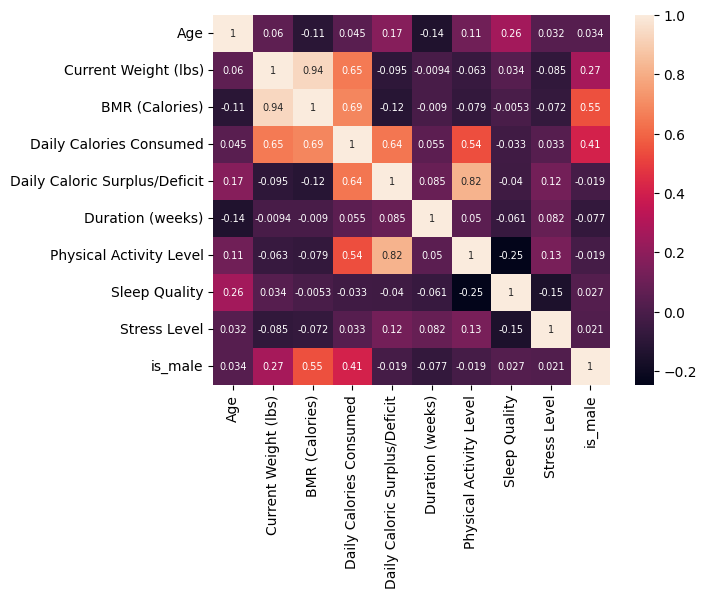

In [76]:
sns.heatmap(data = X_train.corr(), annot=True,annot_kws={'size':7})

In [77]:
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

print(vif)

                        Variable           VIF
0                            Age  1.123452e+01
1           Current Weight (lbs)  3.797868e+02
2                 BMR (Calories)  3.894719e+09
3        Daily Calories Consumed  7.661320e+09
4  Daily Caloric Surplus/Deficit  7.019183e+08
5               Duration (weeks)  5.158782e+00
6        Physical Activity Level  9.880927e+00
7                  Sleep Quality  2.637434e+00
8                   Stress Level  4.612502e+00
9                        is_male  5.029354e+00


In [78]:
# First, we can see that 'BMR (Calories)' and 'Current Weight (lbs)' are highly correlated.
# This make sense, because BMR is calculated using the Weight value.
# Also, we can see that 'BMR (calories)' has a high VIF. Considering this, I will delete this column from X_train and X_test
X_train.drop('BMR (Calories)', axis=1, inplace=True)
X_test.drop('BMR (Calories)', axis=1, inplace=True)
X_train

,Age,Current Weight (lbs),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,is_male
45,45,197.8,4000.0,1395.6,12,2,2,7,0
35,26,172.4,3379.8,934.0,2,1,0,1,0
38,21,191.5,4000.0,1090.8,4,1,1,5,1
2,32,142.8,2785.4,666.0,7,0,2,3,0
94,22,214.4,4000.0,867.3,12,1,2,3,1
...,...,...,...,...,...,...,...,...,...
31,20,158.3,4000.0,1418.1,10,3,0,5,1
68,31,140.4,3602.8,1254.6,2,1,2,2,1
65,48,203.1,3451.7,562.2,3,0,2,1,1
69,40,137.2,3827.8,1804.5,9,3,0,1,0


In [79]:


# Let's recalculate VIF
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

print(vif)

                        Variable         VIF
0                            Age   10.792781
1           Current Weight (lbs)  377.151318
2        Daily Calories Consumed  943.109712
3  Daily Caloric Surplus/Deficit  156.420625
4               Duration (weeks)    5.048914
5        Physical Activity Level    9.803272
6                  Sleep Quality    2.626052
7                   Stress Level    4.350831
8                        is_male    4.960597


In [80]:


# We can see that 'Physical Activity Level' and 'Daily Caloric Surplus/Deficit' are also highly correlated.
# It makes sense because the more Physical Activity, the more Caloric consumption.
# I will discard 'Daily Caloric Surplus/Deficit' since it has the bigger VIF
X_train.drop('Daily Caloric Surplus/Deficit', axis=1, inplace=True)
X_test.drop('Daily Caloric Surplus/Deficit', axis=1, inplace=True)
X_train

,Age,Current Weight (lbs),Daily Calories Consumed,Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,is_male
45,45,197.8,4000.0,12,2,2,7,0
35,26,172.4,3379.8,2,1,0,1,0
38,21,191.5,4000.0,4,1,1,5,1
2,32,142.8,2785.4,7,0,2,3,0
94,22,214.4,4000.0,12,1,2,3,1
...,...,...,...,...,...,...,...,...
31,20,158.3,4000.0,10,3,0,5,1
68,31,140.4,3602.8,2,1,2,2,1
65,48,203.1,3451.7,3,0,2,1,1
69,40,137.2,3827.8,9,3,0,1,0


In [81]:

# Let's recalculate VIF
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(
    X_train.values, i) for i in range(X_train.shape[1])]

print(vif)

                  Variable         VIF
0                      Age    9.803177
1     Current Weight (lbs)   92.067329
2  Daily Calories Consumed  159.736363
3         Duration (weeks)    4.952902
4  Physical Activity Level    7.003281
5            Sleep Quality    2.594134
6             Stress Level    4.233834
7                  is_male    2.943989


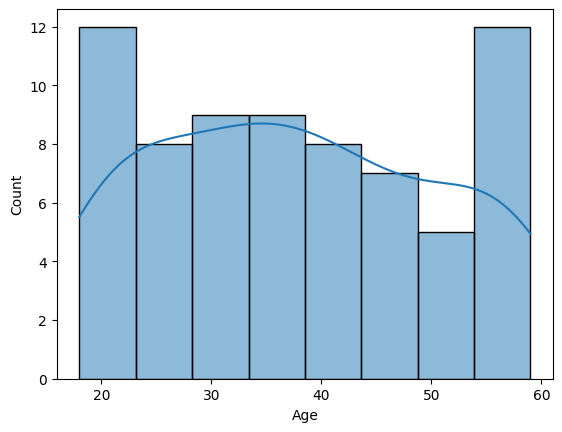

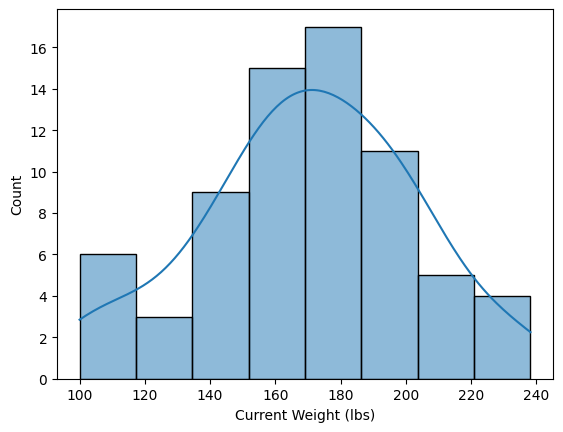

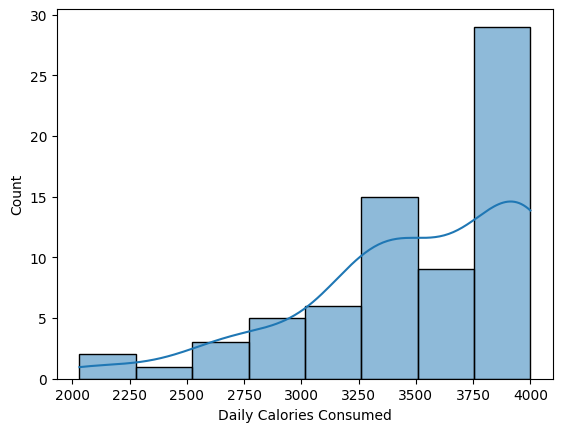

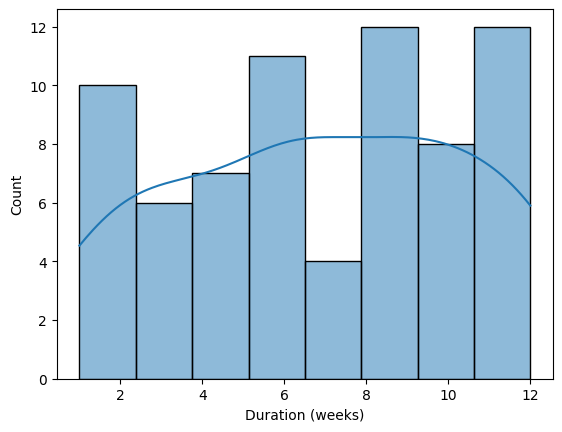

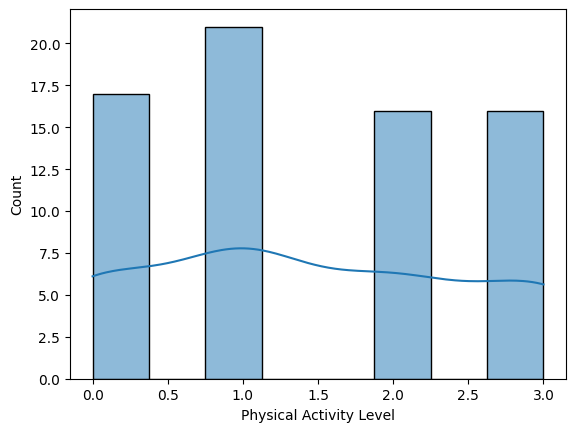

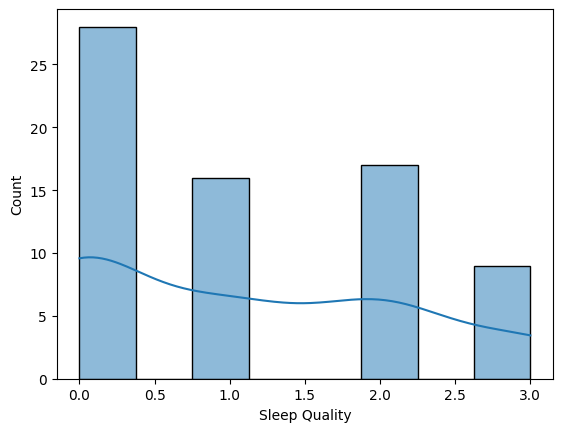

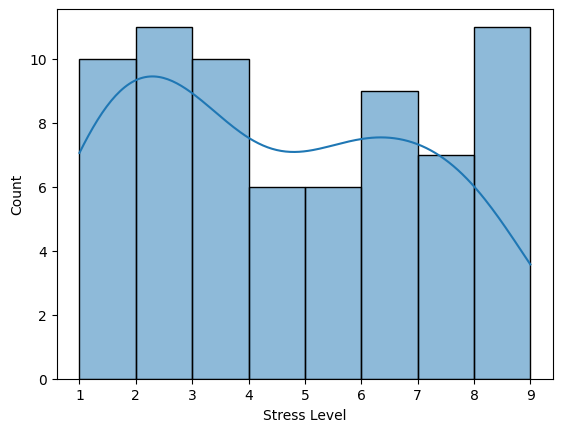

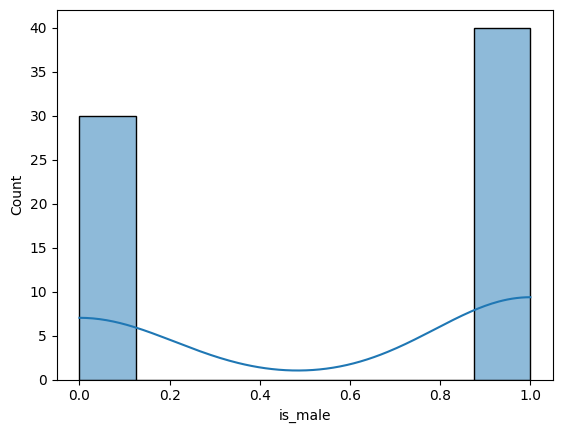

In [82]:
for column in X_train.columns:
    sns.histplot(data=X_train, x=column, kde=True)
    plt.show()

In [83]:


scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

Mean Squared error: 74.10


Text(0, 0.5, 'y pred')

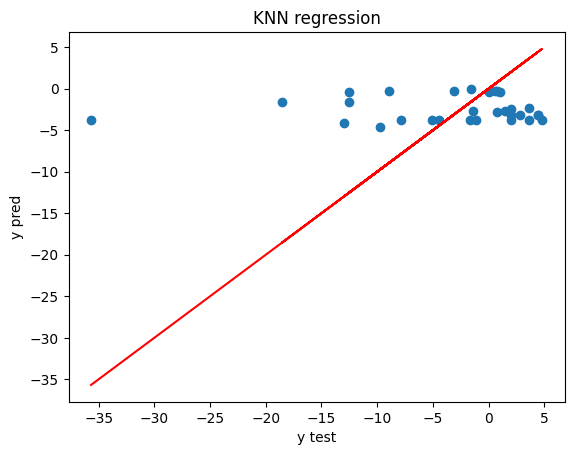

In [84]:
knn_regressor = KNeighborsRegressor(n_neighbors=20)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared error: {mse:.2f}')
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.title('KNN regression')
plt.xlabel('y test')
plt.ylabel('y pred')

c:\Users\mmech\anaconda3\envs\Fall24Mining\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared error: 17.77


Text(0, 0.5, 'y pred')

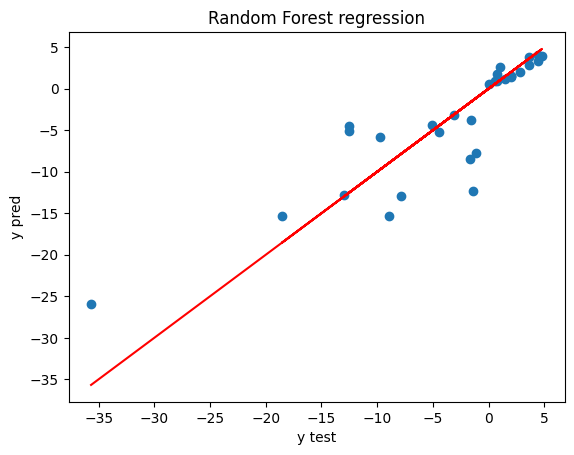

In [85]:


# random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=15, random_state=16)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared error: {mse:.2f}')
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.title('Random Forest regression')
plt.xlabel('y test')
plt.ylabel('y pred')

R² (Ridge): 0.47
Mean Squared error (Ridge): 38.24


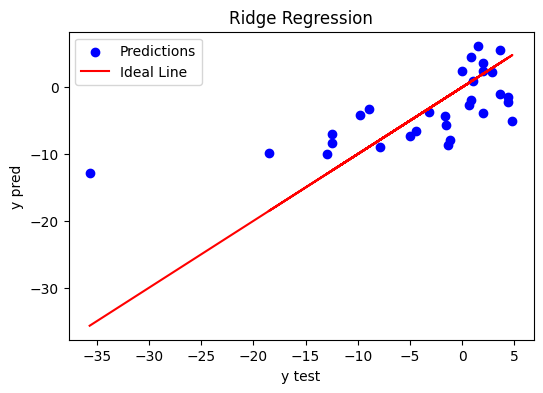

In [86]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Ridge regression
# You can adjust the alpha parameter for regularization strength
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

# Calculate performance metrics
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print results
print(f'R² (Ridge): {r2_ridge:.2f}')
print(f'Mean Squared error (Ridge): {mse_ridge:.2f}')

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_ridge, label='Predictions', color='blue')
plt.plot(y_test, y_test, color='red', label='Ideal Line')
plt.title('Ridge Regression')
plt.xlabel('y test')
plt.ylabel('y pred')
plt.legend()
plt.show()

R² (Lasso): 0.46
Mean Squared error (Lasso): 38.99


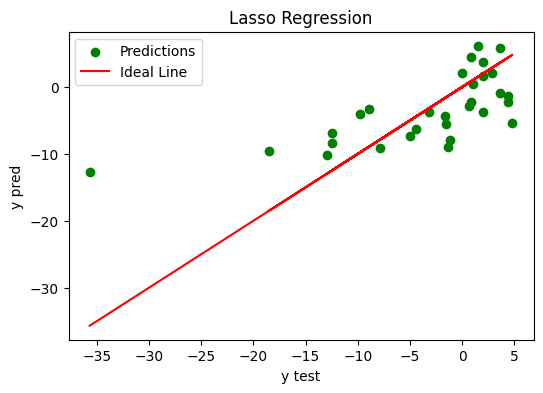

In [87]:
from sklearn.linear_model import Lasso

# Lasso regression
# You can adjust the alpha parameter for regularization strength
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)

# Calculate performance metrics
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

# Print results
print(f'R² (Lasso): {r2_lasso:.2f}')
print(f'Mean Squared error (Lasso): {mse_lasso:.2f}')

# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_lasso, label='Predictions', color='green')
plt.plot(y_test, y_test, color='red', label='Ideal Line')
plt.title('Lasso Regression')
plt.xlabel('y test')
plt.ylabel('y pred')
plt.legend()
plt.show()

R²: 0.47
Mean Squared error: 38.16


Text(0, 0.5, 'y pred')

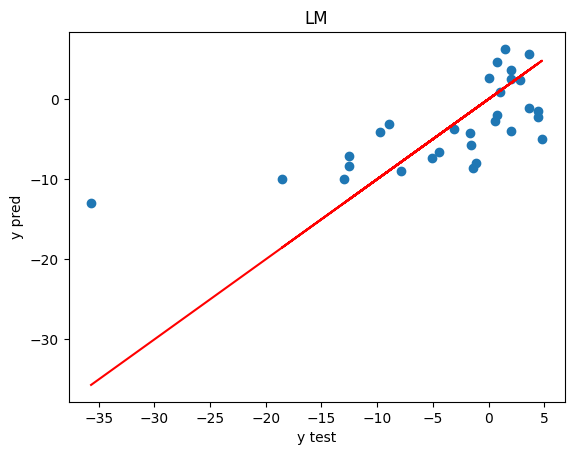

In [88]:


# linear regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2:.2f}')
print(f'Mean Squared error: {mse:.2f}')
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.title('LM')
plt.xlabel('y test')
plt.ylabel('y pred')

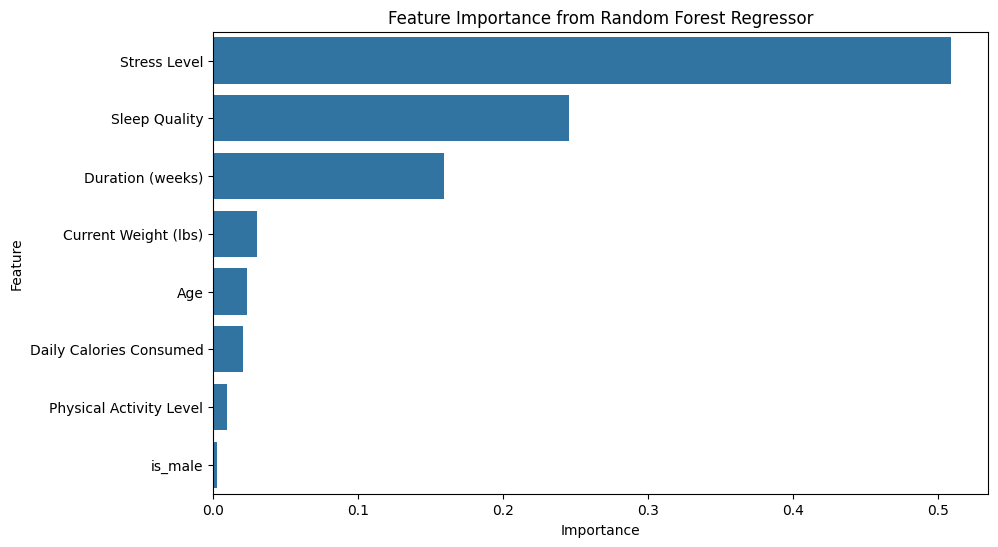

In [89]:


# Let's check feature importance in this model

# Get feature importances from the Random Forest Regressor model
importances = rf_regressor.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame(
    {'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(
    'Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest Regressor')
plt.show()

In [91]:
def categorize_weight_change(value):
    if pd.isna(value):  # Handle missing values
        return 'Unknown'
    elif value < -1:
        return 'Weight Loss'
    elif -1 <= value <= 1:
        return 'No Change'
    else:
        return 'Weight Gain'


df['Weight Change Category'] = df['Weight Change (lbs)'].apply(
    categorize_weight_change)

# Encode the target variable
label_encoder = LabelEncoder()
df['Weight Change Category Encoded'] = label_encoder.fit_transform(
    df['Weight Change Category'])

In [102]:
from sklearn.pipeline import make_pipeline


X_clf = df.drop(['Weight Change (lbs)', 'Weight Change Category',
                'Weight Change Category Encoded'], axis=1)
y_clf = df['Weight Change Category Encoded']

# Split the data
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.3, random_state=42, stratify=y_clf)

# Create pipeline with scaling and logistic regression
lr_classifier = make_pipeline(
    StandardScaler(), LogisticRegression(max_iter=3000))

# Fit the model
lr_classifier.fit(X_train_clf, y_train_clf)

# Predict and evaluate
lr_predictions_clf = lr_classifier.predict(X_test_clf)

In [103]:
from sklearn.metrics import classification_report

def evaluate_classification_model(y_true, y_pred, model_name):
    print(f'{model_name} Classification Report:')
    print(classification_report(y_true, y_pred,
          target_names=label_encoder.classes_))


# Evaluate Logistic Regression Classifier
evaluate_classification_model(
    y_test_clf, lr_predictions_clf, 'Logistic Regression')

Logistic Regression Classification Report:
              precision    recall  f1-score   support

   No Change       0.50      0.40      0.44         5
 Weight Gain       0.71      0.91      0.80        11
 Weight Loss       0.75      0.64      0.69        14

    accuracy                           0.70        30
   macro avg       0.65      0.65      0.65        30
weighted avg       0.70      0.70      0.69        30



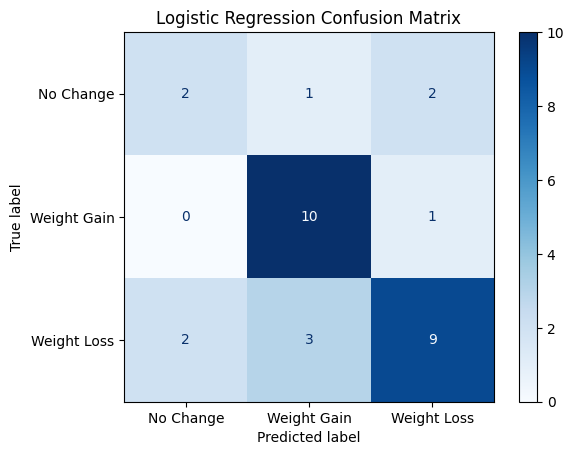

In [105]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()


# Plot for Logistic Regression
plot_confusion_matrix(y_test_clf, lr_predictions_clf, 'Logistic Regression')

In [108]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_clf, y_train_clf)
dt_predictions_clf = dt_classifier.predict(X_test_clf)

In [109]:
def evaluate_classification_model(y_true, y_pred, model_name):
    print(f'{model_name} Classification Report:')
    print(classification_report(y_true, y_pred,
          target_names=label_encoder.classes_))


# Evaluate Decision Tree Classifier
evaluate_classification_model(
    y_test_clf, dt_predictions_clf, 'Decision Tree Classifier')

Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

   No Change       0.57      0.80      0.67         5
 Weight Gain       0.91      0.91      0.91        11
 Weight Loss       1.00      0.86      0.92        14

    accuracy                           0.87        30
   macro avg       0.83      0.86      0.83        30
weighted avg       0.90      0.87      0.88        30



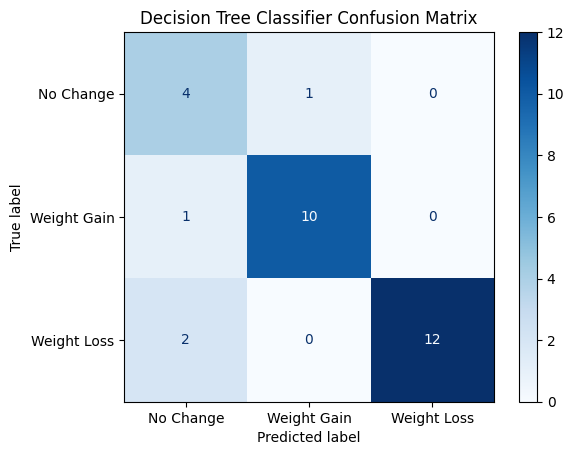

In [110]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()


# Plot for Decision Tree Classifier
plot_confusion_matrix(y_test_clf, dt_predictions_clf,
                      'Decision Tree Classifier')

In [111]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_clf, y_train_clf)
rf_predictions_clf = rf_classifier.predict(X_test_clf)

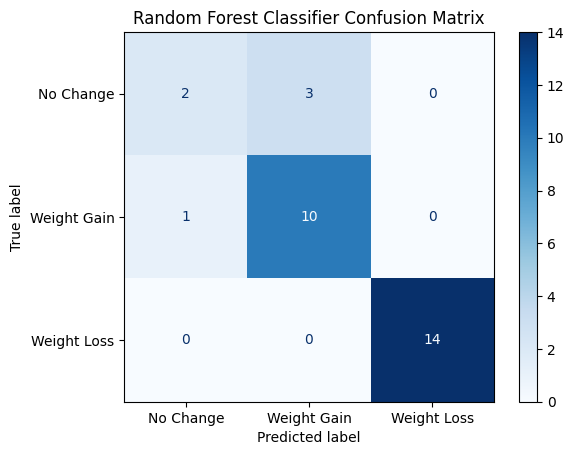

In [112]:
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()


# Plot for Random Forest Classifier
plot_confusion_matrix(y_test_clf, rf_predictions_clf,
                      'Random Forest Classifier')

In [115]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 4, 6, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_clf, y_train_clf)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best estimator
best_rf_classifier = grid_search.best_estimator_

# Make predictions with the optimized model
best_rf_predictions = best_rf_classifier.predict(X_test_clf)

# Evaluate the optimized model
evaluate_classification_model(
    y_test_clf, best_rf_predictions, 'Optimized Random Forest Classifier')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'bootstrap': False, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Optimized Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

   No Change       0.67      0.40      0.50         5
 Weight Gain       0.77      0.91      0.83        11
 Weight Loss       1.00      1.00      1.00        14

    accuracy                           0.87        30
   macro avg       0.81      0.77      0.78        30
weighted avg       0.86      0.87      0.86        30

